### Normal Simulation

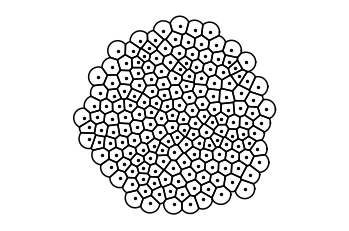

In [341]:
from Organoid2D import Organoid
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

org = Organoid()
org.evolution(T=0.001, file = 'organoid_mid.csv', mode='transcription')
org.cellPlot()

### PCF examples

#### Mesh divided cell clusters

-0.2294922617689558


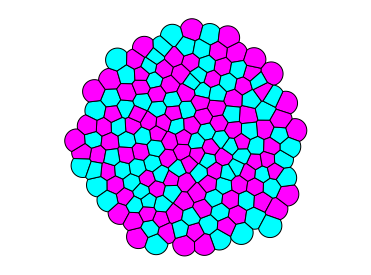

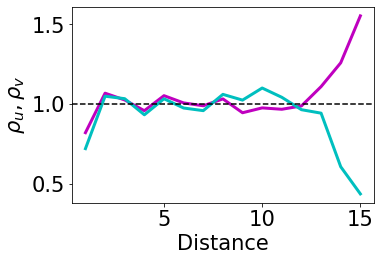

In [353]:
org.mesh = {}

# Number of lines in that dimension which cut through the organoid
Nx = 13
Ny = 13

x = np.linspace(np.min(org.xy[:,0]) - org.r_max/2, np.max(org.xy[:,0]) + org.r_max/2, Nx+2)
y = np.linspace(np.min(org.xy[:,1]) - org.r_max/2, np.max(org.xy[:,1]) + org.r_max/2, Ny+2)

org.G = np.zeros(org.nofCells)
for i in range(Nx+1):
    for j in range(Ny+1):
        if (i+j)%2 == 0:
            org.G[(x[i] <= org.xy[:,0]) & (org.xy[:,0] < x[i+1]) & (y[j] <= org.xy[:,1]) & (org.xy[:,1] < y[j+1])] = 1   

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

#im = plt.imread('test.png')

fig=plt.figure()
org.pcf(font_size = 14*3/2, lw = 3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

#### Radially divided cell clusters

0.7757160425813704


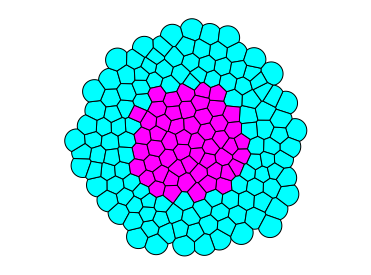

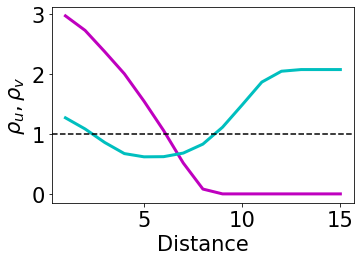

In [360]:
center = np.mean(org.xy, axis=0)
norm = ((org.xy[:,0]-center[0])**2 + (org.xy[:,1]-center[1])**2)**0.5
r_max = np.max(norm)

Nr = 1
r = np.linspace(0,r_max,Nr+2)

org.G = np.zeros(org.nofCells)
for i in range(Nr+1):
    if i%2 == 0:
        org.G[(r[i] < norm) & (norm <= r[i+1])] = 1

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
#plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.pdf', transparent = True)

#im = plt.imread('test.png')
#
fig=plt.figure()
org.pcf(font_size = 14*3/2, lw=3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')

plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

### Cell pair visualization

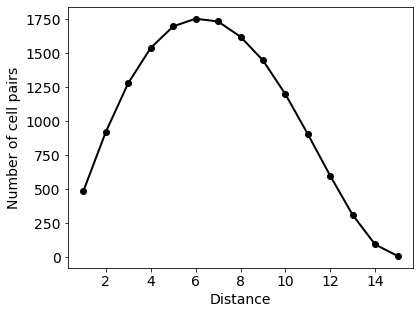

In [256]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)

pairs = np.empty(int(np.max(org.GraphDist)))
for i in range(len(pairs)):
    pairs[i] = len(org.GraphDist[org.GraphDist == i+1])/2
    
distances = list(range(1,len(pairs)+1))

plt.plot(distances, pairs, lw = 2, marker='o', color='k')
plt.gcf().subplots_adjust(left=0.15)
plt.xlabel('Distance')
plt.ylabel('Number of cell pairs')
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.pdf', transparent = True)

### Moran's I examples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import pandas as pd

Nx = 8
d = 1

xy = np.empty([Nx*Nx, 2])
for i in range(Nx):
    for j in range(Nx):
        xy[i*Nx+j] = [j*d, i*d]
        
def neighbors(i, N):
    ix = i%N
    iy = int((i-ix)/N)
    
    if int(i/N)%2 == 0:
        ilr = - 1
    else:
        ilr = 1
    
    # above
    n1 = (iy + 1)*N + (ix + 0)%N
    
    # same row 
    n2 = (iy + 0)*N + (ix + 1)%N
    n3 = (iy + 0)*N + (ix - 1)%N
    
    # below
    n4 = (iy - 1)*N + (ix + 0)%N
    
    return [n1%N**2,n2%N**2,n3%N**2,n4%N**2]
        
def fate_distribution(org, dist_type):
    if dist_type == 'random':
        org.N = np.round(np.random.random(org.nofCells))
    if dist_type == 'cluster':
        center = np.mean(org.xy, axis=0)
        org.N = np.zeros(org.nofCells)
        org.N[org.xy[:,0] -  center[0] < 0] = 1
    if dist_type == 'checkerboard':
        for i in range(Nx):
            for j in range(Nx):
                if (i+j)%2==0:
                    org.N[i*Nx+j] = 1
    
    org.G = 1 - org.N
    
    return

import pandas as pd
df = pd.DataFrame()
df['x-Position'] = xy[:,0]
df['y-Position'] = xy[:,1]
df['Radius'] = np.ones(len(xy))*0.7
df.to_csv('8x8.csv', index = False)

from Organoid2D import Organoid

org = Organoid()
org.GraphDist = np.zeros([len(xy), len(xy)])
for i in range(len(xy)):
    org.GraphDist[i, neighbors(i, Nx)] = 1
    
org.evolution(T=0.001, file='8x8.csv', mode="transcription")

fate_distribution(org, 'cluster')

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.cellPlot(org.N, size=0)

org.moran()
print(org.Morans_I)

plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.pdf', transparent = True)

### Visualization of forces acting on two cells

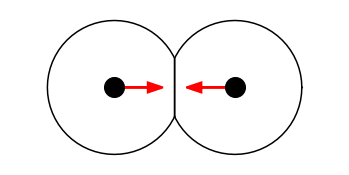

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from Organoid2D import Organoid

org = Organoid()
d = 0.9
org.xy = np.array([[-d,0],[d,0]])
org.r = np.array([1, 1])
org.nofCells = 2
org.dist = cdist(org.xy, org.xy)

plt.figure()
org.cellPlot(size = 400)
#plt.axis('on')
for xy in org.xy:
    if d < 0.7:
        plt.arrow(xy[0], xy[1], np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
    if d > 0.7 and d < 1:
        plt.arrow(xy[0], xy[1], -np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
plt.axis('square')
plt.xlim([-2.5,2.5])
plt.ylim([-1.2,1.2])

plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.pdf', transparent = True)

### Morse potential

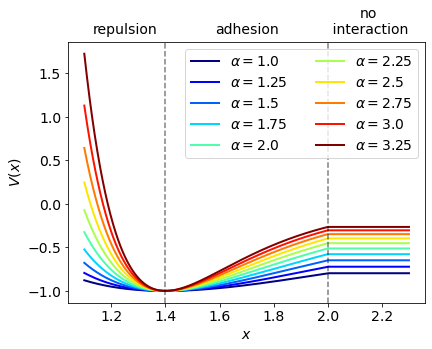

In [206]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')

def morse_potential(x, a, σ):
    V = np.exp(-2*a*(x - σ*2)) - 2*np.exp(-a*(x - σ*2))
    V[x >= 2] = np.exp(-2*a*(2 - σ*2)) - 2*np.exp(-a*(2 - σ*2))
    return V

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_potential(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V(x)$")

y0, y1 = plt.ylim()
y = y1 + .03*(abs(y0)+abs(y1))
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.pdf', transparent = True)

### Morse potential derivative (force)

2.21 -5.0 2.0


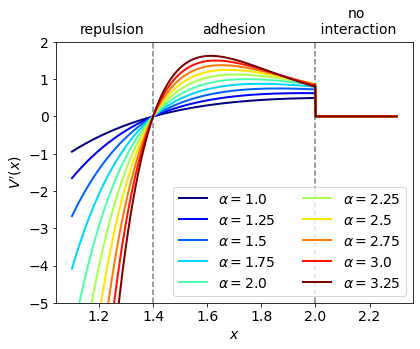

In [238]:
def morse_force(x, a, σ):
    F = - 2*a*np.exp(-2*a*(x - σ*2)) + 2*a*np.exp(-a*(x - σ*2))
    F[x >= 2] = 0
    return F

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_force(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V'(x)$")

y0, y1 = plt.ylim([-5,2])
y = y1 + .03*(abs(y0)+abs(y1))
print(y, y0, y1)
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.pdf', transparent = True)

### Cell division distance using Lambert W function <span style="color:red">(does not work since function argument is $-<\frac{1}{e}$)</span>

-0.09969792046063913 -0.36787944117144233
-0.06870494983790335 -0.36787944117144233
-0.054482661416751066 -0.36787944117144233
-0.04891085200377088 -0.36787944117144233
-0.047982405417245966 -0.36787944117144233
-0.04961289525424915 -0.36787944117144233
-0.05267941765222728 -0.36787944117144233
-0.05656224972204125 -0.36787944117144233
-0.06091345070883331 -0.36787944117144233
-0.06553522843973264 -0.36787944117144233


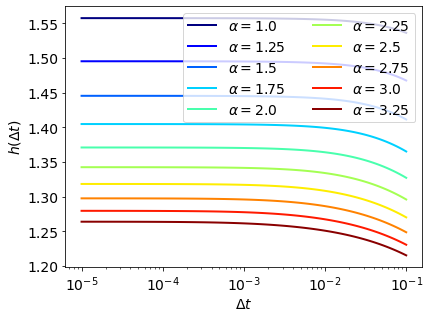

In [356]:
from scipy.special import lambertw

a = 1
F0 = .1
r = 0.95/2**(1/3)
s = 0.7

DT = np.logspace(-5,-1,K)

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,.99,N)

K = 100
DT = np.logspace(-5,-1,K)
plt.figure(figsize=[6.4, 4.8])

plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        rhs = - 2*A[i]*F0*DT[j] + np.exp(-2*A[i]*s*r) + np.log(1 - np.exp(-2*A[i]*s*r))
        x = np.log(-lambertw(-np.exp(rhs-1))+1)
        H[j] = np.real(x/A[i] + 2*s*r)
    
    print(rhs, -1/np.exp(1))
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2)

### Cell division distance using nonlinear solver

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered 

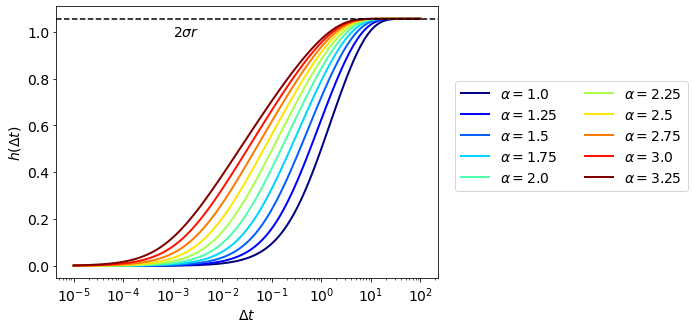

In [256]:
from scipy.optimize import fsolve

a = 1
F0 = .1
r = 0.95/2**(1/3)
sigma = 0.7

f = lambda h, dt, a: 2*a*F0*dt + np.exp(a*(h-2*r*sigma)) + np.log(1 - np.exp(a*(h-2*r*sigma))) \
                    - np.exp(a*(-2*r*sigma)) - np.log(1 - np.exp(a*(-2*r*sigma)))

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,1,N)

K = 100
DT = np.logspace(-5,2,K)

plt.figure(figsize=[11, 4.8])
plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        F = lambda h: f(h, DT[j], A[i])
        dF = lambda h: -A[i]*np.exp(A[i]*(h-2*r*sigma))/(np.exp(-A[i]*(h-2*r*sigma))-1)
        H[j] = fsolve(F, 1.9999*sigma*r, fprime=dF)
        
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.text(0.001,2*sigma*r - 0.075,"$2 \\sigma r$")
plt.axhline(2*sigma*r, linestyle='dashed', color='k', zorder=10)
plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(1.35, .75))

#plt.gcf().subplots_adjust(right=0.5)
plt.tight_layout()
plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.pdf', transparent = True)

In [453]:
print(a)
print(F0)
print(r)
print(sigma)

1
0.1
0.7540154996848947
0.7


### Radius growth equation

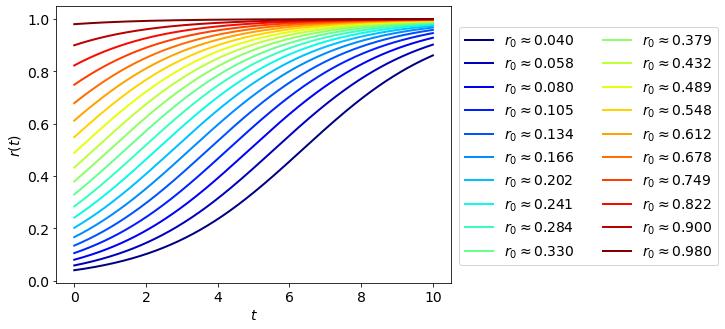

In [104]:
import matplotlib

def radius(t, k, r0, r_max):
    return r_max/(1 + ((r_max - r0)/r0)*np.exp(-k*r_max*t))

cmap = matplotlib.cm.get_cmap('jet')

k = 0.5
r_max = 1
T = 10
nofSteps = 1000
t = np.linspace(0,T,nofSteps)

f = lambda r: k*r*(r_max - r)

N = 20
r0 = np.linspace(0.2,0.99,N)**2
#r0 = np.logspace(-3,0,N)
color_spacing = np.linspace(0,1,N)

plt.figure(figsize=[11.5, 4.8])
plt.rc('font', size=14)
for i in range(N):
    
    rgba = cmap(color_spacing[i])
    r = radius(t, k, r0[i], r_max)
    
    plt.plot(t, r, label="$r_0 \\approx " + "{:.3f}".format(r0[i]) + "$", lw=2, color=rgba)
    
plt.xlabel('$t$')
plt.ylabel('$r(t)$')
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(1.35, 0.95))

plt.tight_layout()

plt.savefig('Results/PhD Thesis/Radius pictures/radius_logistic.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/radius_logistic.pdf', transparent = True)

### Equations of motion (fully inert / constant mass / none)

6.4641824147938136e-24 6.4641824147938136e-24 9.320058205649722e-16 4.188790204786391e-12 144180000.00000003


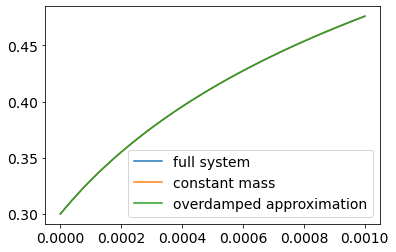

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def morse_force(x, r, a, σ):
    F = - 2*a*np.exp(-2*a*(x - σ*r*2)) + 2*a*np.exp(-a*(x - σ*r*2))
    if F >= 2:
        F = 0
    return F

def radius(t, k, r0, r_max):
    return r_max/(1 + ((r_max - r0)/r0)*np.exp(-k*r_max*t))

x_ref = 2*1e-5
m_ref = 4/3*np.pi*(x_ref/2)**3*1e3
b = 3*np.pi*8.9*1e-4*x_ref
T_ref = 3600
k = .5

α = m_ref*x_ref/T_ref**2
β = m_ref*x_ref/T_ref**2
γ = b*x_ref/T_ref
F0 = 1e-15
print(α, β, γ, m_ref, γ/α)

N = 10000
t = np.linspace(0,0.001,N)

def f_full(u,t):
    x = u[0]
    v = u[1]
    
    r = radius(t, k, 0.7, 1)
    dm = 4*np.pi*0.5*r**3*(1 - r)
    
    F = morse_force(x, r, 3, 0.7)
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - β/α*dm*v - γ/α*v - F0/α*F
    
    return rhs

def f_mass(u,t):
    x = u[0]
    v = u[1]
    
    r = radius(t, k, 0.7, 1)
    F = morse_force(x, r, 3, 0.7)
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - γ/α*v - F0/α*F
    
    return rhs

def f_none(u,t):
    x = u[0]
    
    r = radius(t, k, 0.7, 1)
    F = morse_force(x, r, 3, 0.7)
    
    rhs = - F0/γ*F
    
    return rhs

u_full = odeint(f_full, [.3,0], t)
u_mass = odeint(f_mass, [.3,0], t)
u_none = odeint(f_none, .3, t)

plt.plot(t, u_full[:,0], label='full system')
plt.plot(t, u_mass[:,0], label='constant mass')
plt.plot(t, u_none, label='overdamped approximation')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

T = 10
N = 10000
t = np.linspace(0,T,N)
dt = t[1]-t[0]

x = np.zeros(N)
u = np.zeros(N)
y = np.zeros(N)
v = np.zeros(N)
m = np.zeros(N)
z = np.zeros(N)

k = 30
M = 10
m_max = 1.2*M
alpha = 1

γ = 60

z[0] = 1

def f1(u,t):
    x = u[0]
    v = u[1]
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = -k/M*x - γ/M*v
    
    return rhs

def f2(u,t):
    x = u[0]
    v = u[1]
    m = u[2]
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - k/m*x - γ/m*v + alpha*(m_max - m)*v
    rhs[2] = alpha*m*(m_max - m)
    
    return rhs

def f3(u,t):
    return -k*u/γ

u1 = odeint(f1, [1,0], t)
u2 = odeint(f2, [1,0,0.7*M], t)
u3 = odeint(f3, 1, t)
    
plt.plot(t, u1[:,0], label='constant mass')
plt.plot(t, u2[:,0], label='variable mass')
plt.plot(t, u3, label='overdamped appr.')
plt.legend()

print('damping ratio =', γ/2/(M*k)**(1/2))

### Organoid growth rate

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from Organoid import Organoid
from scipy.optimize import curve_fit
import pandas as pd

N = 100
T = np.random.uniform(1,24,N)

nofCells = np.empty(N)
for i in range(N):
    org = Organoid()
    org.k = 0.07
    org.evolution(T=30, dim=2, ignore=['transcription', 'displacement'])
    nofCells[i] = org.nofCells
    
plt.scatter(T, nofCells)
plt.plot(T, np.exp(Λ1*T), label = "$\\Lambda_{0,24}$")
plt.plot(T, np.exp(Λ2*T), label = "$\\Lambda_{24,48}$")
plt.plot(T, np.exp(Λ3*T), label = "$\\Lambda_{0,48}$")
#plt.yscale('log')

#popt, _ = curve_fit(f, )

KeyboardInterrupt: 

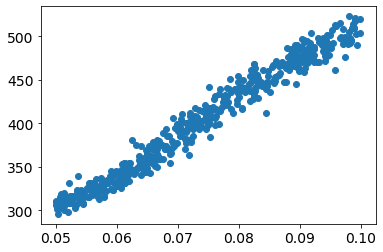

In [220]:
n0 = 200
n24 = 441.735294117647
n48 = 1041.2380952380954

N = 500
K = np.random.uniform(0.05,0.1,N)
dim = 3
dim_scal = 1/2**(1/dim)

nofCells = np.empty(N)
for j in range(len(K)):
    org = Organoid()
    org.k = K[j]
    
    initial_org = pd.DataFrame()
    initial_org['x-Position'] = np.random.uniform(0,1,200)
    initial_org['y-Position'] = np.random.uniform(0,1,200)
    initial_org['z-Position'] = np.random.uniform(0,1,200)
    initial_org['Radius'] = np.random.uniform(0.9*dim_scal, 1, 200)
    initial_org.to_csv('test.csv', index=False)
    
    org.evolution(T=24, dim=3, file='test.csv', ignore=['transcription', 'displacement'])
    nofCells[j] = org.nofCells
    
plt.scatter(K, nofCells)

0.08278662224952961


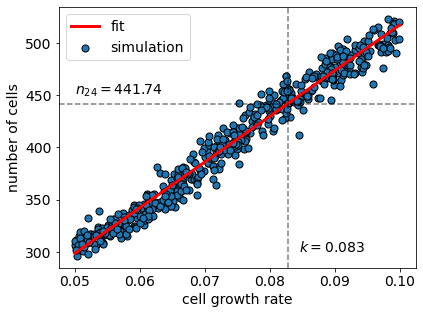

In [267]:
from scipy.optimize import curve_fit

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.scatter(K, nofCells, linewidths=1, edgecolors='k', label='simulation', s=50)
plt.axhline(n24, color = 'k', linestyle = 'dashed', alpha = 0.5)

k = np.linspace(0.05,0.1,1000)
f = lambda x, a, b: a*x + b

popt, pcov = curve_fit(f, K, nofCells)
plt.plot(k, f(k,*popt), color='r', lw=3, label='fit')
print(n24/popt[0] - popt[1]/popt[0])
plt.axvline(n24/popt[0] - popt[1]/popt[0], color = 'k', linestyle = 'dashed', alpha = 0.5)
plt.text(0.05,n24+n24*0.02,"$n_{24} = 441.74$")
plt.text(n24/popt[0] - popt[1]/popt[0]+(n24/popt[0] - popt[1]/popt[0])*0.02,300,"$k = 0.083$")
plt.legend()

plt.xlabel('cell growth rate')
plt.ylabel('number of cells')

plt.savefig('Results/PhD Thesis/Radius pictures/growth_rate_estimation.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/growth_rate_estimation.pdf', transparent = True)

In [222]:
N = 500
T = np.random.uniform(0,270,N)

nofCells2D = np.empty(N)
for j in range(N):
    org = Organoid()
    org.k = 0.083
    org.evolution(T=T[j], dim=2, ignore=['transcription', 'displacement'])
    nofCells2D[j] = org.nofCells
    
nofCells3D = np.empty(N)
for j in range(N):
    org = Organoid()
    org.k = 0.083
    org.evolution(T=T[j], dim=3, ignore=['transcription', 'displacement'])
    nofCells3D[j] = org.nofCells

[0.02453354] [0.02961006]


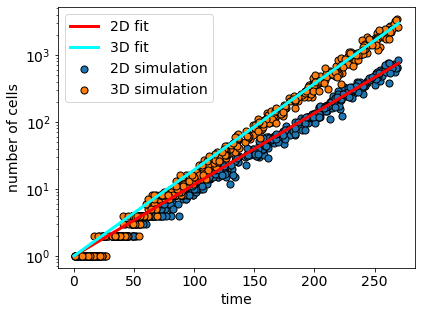

In [266]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.scatter(T, nofCells2D, linewidths=1, edgecolors='k', label='2D simulation', s=50)
plt.scatter(T, nofCells3D, linewidths=1, edgecolors='k', label='3D simulation', s=50)

t = np.linspace(0,270,1000)
f = lambda x, a: np.exp(a*x)

popt2D, pcov = curve_fit(f, T, nofCells2D, p0=0.03)
plt.plot(t, f(t,*popt2D), color='r', lw=3, label='2D fit')
popt3D, pcov = curve_fit(f, T, nofCells3D, p0=0.03)
plt.plot(t, f(t,*popt3D), color='cyan', lw=3, label='3D fit')
print(popt2D, popt3D)
plt.legend()
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('number of cells')

plt.savefig('Results/PhD Thesis/Radius pictures/population_growth.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/population_growth.pdf', transparent = True)

In [271]:
print(popt2D*24/np.log(2), popt3D*24/np.log(2))

[0.84946592] [1.02523883]


### Division probability

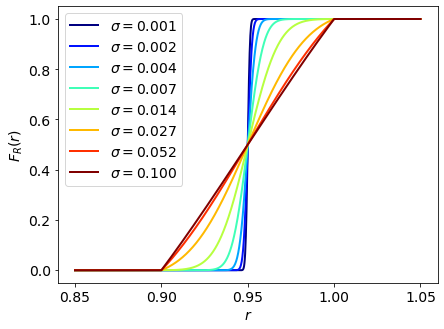

In [346]:
from scipy.special import erf
import matplotlib
                     
def truncated_normal_cdf(x, mu, sigma, interval):
    cdf = lambda y: (1 + erf(y/2**(1/2)))
    
    a = (interval[0] - mu)/sigma           
    b = (interval[1] - mu)/sigma
    z = (x - mu)/sigma
    
    CDF = (cdf(z) - cdf(a)) / (cdf(b) - cdf(a))
    CDF[CDF <= 0] = 0
    CDF[CDF >= 1] = 1
    return CDF

cmap = matplotlib.cm.get_cmap('jet')
N = 8
color_spacing = np.linspace(0,1,N)
x = np.linspace(0.85,1.05,1000)
σ = np.logspace(-3,-1,N)#[0.03, 0.015, 0.09]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(N):
    
    rgba = cmap(color_spacing[i])
    
    plt.plot(x, truncated_normal_cdf(x, 0.95, σ[i], [0.9,1]), label="$\\sigma = " + "{:.3f}".format(σ[i]) + "$", lw=2, color=rgba)
    
plt.xlabel('$r$')
plt.xticks([0.85, 0.9, 0.95, 1, 1.05])
plt.ylabel('$F_R(r)$')
plt.legend()

plt.tight_layout()

plt.savefig('Results/PhD Thesis/Radius pictures/division_probability.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/division_probability.pdf', transparent = True)

In [ ]:
def truncated_normal_cdf(x, mu, sigma, interval):
    cdf = lambda y: (1 + erf(y/2**(1/2)))
    
    a = (interval[0] - mu)/sigma           
    b = (interval[1] - mu)/sigma
    z = (x - mu)/sigma
    
    CDF = (cdf(z) - cdf(a)) / (cdf(b) - cdf(a))
    CDF[CDF <= 0] = 0
    CDF[CDF >= 1] = 1
    return CDF

def truncated_normal_pdf(x, mu, sigma, interval):
    pdf = lambda y: np.exp(-y**2/2)/(2*np.pi)**(1/2)
    cdf = lambda y: (1 + erf(y/2**(1/2)))
    
    a = (interval[0] - mu)/sigma           
    b = (interval[1] - mu)/sigma
    z = (x - mu)/sigma
    
    PDF = pdf(z) / (cdf(b) - cdf(a)) / sigma
    return PDF

def cell_number_sim(T, nofSteps, nofSims):
    dt = T/nofSteps
    dim_factor = (1/2)**(1/3)
    r_max = 1
    k = 0.5
    nofCells = []
    for i in range(nofSims):
        r = np.array([0.95*dim_factor, 0.95*dim_factor])
        r0 = np.array([0.95*dim_factor, 0.95*dim_factor])
        t0 = np.array([0,0])
        t = 0
        for i in range(nofSteps):
            t += dt

            r_old = r
            r = radius(t, t0, r0, r_max, k)

            P0 = Prob(r_old, 1)       
            P = Prob(r, 1)

            Probability = (P-P0)/(1-P0)
            #Prob[r_old == r0] = P[r_old == r0]

            random_numbers = np.random.rand(len(r))
            indices = np.where(random_numbers < Probability)

            r_new = r[indices]*dim_factor
            r[indices] = r_new
            r = np.append(r, r_new)

            r0[indices] = r_new
            r0 = np.append(r0, r_new)

            t0[indices] = t
            t0 = np.append(t0, t0[indices])

        nofCells.append(len(r))
        
    return nofCells

def cell_number_int(T):
    k = 0.5
    n0 = 1
    t0 = 0
    r_max = 1
    dim_factor = (1/2)**(1/3)
    
    n_part = lambda t_D: 2**(T/t_D)*n0
    t_D = lambda r, r0: t0 + 1/(k*r_max)*np.log(r*(r_max-r0)/r0/(r_max-r))
    n = lambda r, r0: n_part(t_D(r, r0))
    f_r = lambda r: truncated_normal_pdf(r, 0.95, 0.015, [0.9,1]):
    F = lambda r, r0: n(r,r0*dim_factor)*f_r(r)*f_r(r0)

    box = [[0.9, 1], [0.9, 1]]
    I, err = nquad(F, box)
    
    return I

def cell_number_eq(T):
    k = 0.5
    n0 = 1
    t0 = 0
    r_max = 1
    r = 0.95
    r0 = r*dim_factor
    
    t_D = t0 + 1/(k*r_max)*np.log(r*(r_max-r0)/r0/(r_max-r))
    n = 2**(T/t_D)*n0
    
    return n

ts = np.linspace(0,30,100)
nofSteps = 10
nofSims = 50
Sims = np.empty([len(ts), nofSims])
Ints = np.empty([len(ts)])
Eqs = np.empty([len(ts)])
Var = np.empty([len(ts)])
for i, t in enumerate(ts):
    Sims[i, :] = cell_number_sim(t, nofSteps, nofSims)
    Ints[i] = cell_number_int(t)
    Eqs[i] = cell_number_eq(t)
    Var[i] = variance_int(t)
    
for i in range(nofSims):    
    plt.scatter(ts, Sims[:,i], color='k')
    
plt.plot(ts, Ints, 'r', lw=2)
plt.plot(ts, Eqs, 'r', lw=2)